In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
%matplotlib inline

In [2]:
df = pd.read_csv('BankCustomers.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
# convert categorical feature into dummy variables

states=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

#concatenate the remaining dummies columns
X=pd.concat([X,states,gender],axis=1)

#drop the columns as it is no longer required

X=X.drop(['Geography','Gender'],axis=1)

In [6]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)
X=scaled_data

Using TensorFlow backend.


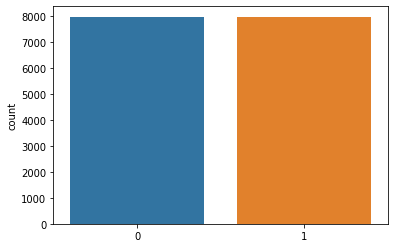

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
sns.countplot(y_resampled, data=df)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 0)

In [12]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
predictions=dtree.predict(X_test)

In [20]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("F1 Score: ",f1_score(y_test,predictions))
print('Accuracy =', accuracy_score(y_test,predictions))

[[1919  465]
 [ 354 2040]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2384
           1       0.81      0.85      0.83      2394

    accuracy                           0.83      4778
   macro avg       0.83      0.83      0.83      4778
weighted avg       0.83      0.83      0.83      4778

F1 Score:  0.8328230251071647
Accuracy = 0.828589367936375


In [29]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X_resampled,y_resampled,cv=5)
print("Corss_Vall result:",score.mean())

Corss_Vall result: 0.8210544640970074


In [59]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
features = list(train.columns[3:])
features

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [60]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [21]:
rfc=RandomForestClassifier(n_estimators=200, class_weight={0:1, 1:4}, random_state=12)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 4},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=12, verbose=0, warm_start=False)

In [22]:
rfc_pred=rfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print("F1 Score: ",f1_score(y_test,rfc_pred))
print('Accuracy =', accuracy_score(y_test,rfc_pred))

[[2114  270]
 [ 268 2126]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2384
           1       0.89      0.89      0.89      2394

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778

F1 Score:  0.8876826722338206
Accuracy = 0.8874005860192549


In [28]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X_resampled,y_resampled,cv=5)
print("Corss_Vall result:",score.mean())

Corss_Vall result: 0.8966528341645453
